<a href="https://colab.research.google.com/github/Kibet-Rotich/data-science-learning/blob/master/Intro_to_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Introduction to Neural Networks

Neural networks are a mesh of nodes called **neurons**, inspired by the human brain.

In the human brain, neurons fire when a certain threshold is met — activating other neurons in the process. This chain of activation creates pathways that allow us to perceive things like **vision, sound, and speech**.

Similarly, in artificial neural networks, each neuron receives inputs, multiplies them by **weights**, adds a **bias**, and passes the result through an **activation function** to the next layer of neurons.

## 🧩 Non-Linearity

If we simply combined multiple linear functions, the result would still be a **linear model**. To make neural networks capable of learning **complex patterns**, we introduce **non-linear activation functions** such as:

- **Sigmoid** → maps values between 0 and 1.
- **ReLU (Rectified Linear Unit)** → outputs 0 for negative values and the input itself for positive values.
- **Tanh** → maps values between -1 and 1.

These non-linear functions enable the network to approximate **non-linear relationships** in the data.

## 🧱 Layers and Architecture

A **layer** consists of many neurons working together. Multiple layers form a **neural network**.

- The **input layer** receives raw data.
- The **hidden layers** process data through weighted connections.
- The **output layer** gives the final prediction.

When every neuron in one layer connects to every neuron in the next, it’s called a **fully connected (dense) layer**.

In [ ]:
import numpy as np

class Neuron:
    def __init__(self, weights, bias):
        """Initialize a neuron with given weights and bias"""
        self.weights = np.array(weights)
        self.bias = bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(weighted_sum)

In [ ]:
# 🧮 Example of a simple neuron
weights = [0.5, 0.5]
bias = -0.2
inputs = [1, 0]

neuron = Neuron(weights, bias)
output = neuron.compute(inputs)
print(f"Neuron output: {output}")

Neuron output: 0.574442516811659


## ⚙️ Forward Pass

In a **forward pass**, each neuron computes its output and sends it to the neurons in the next layer. This continues layer by layer until the **output layer** produces the final prediction.

- In **classification problems**, the output layer usually has one neuron per class and uses a **softmax** activation to produce probabilities.
- In **regression problems**, the output layer typically has one neuron that predicts a continuous value.

## 📉 Calculating Error and Backpropagation

After making predictions, the network computes how far off it was using a **loss function** (e.g., Mean Squared Error).

The **backpropagation** algorithm then adjusts the weights and biases slightly to reduce the error. Repeating this process across many examples and iterations (called **epochs**) improves model accuracy.

This is the essence of **learning** in neural networks.

# 🧪 Practical Example with Scikit-learn

We'll train a simple neural network using Scikit-learn’s `MLPClassifier` on the `make_moons` dataset to visualize decision boundaries.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Generate the data
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print(f"Model accuracy: {mlp.score(X_test, y_test):.2f}")

Model accuracy: 0.83


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


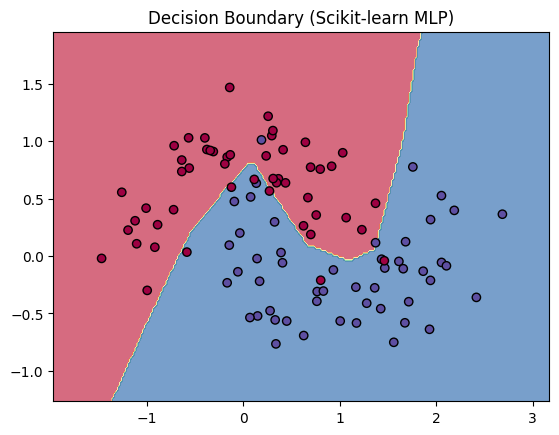

In [ ]:
# 📊 Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
    plt.title("Decision Boundary (Scikit-learn MLP)")
    plt.show()

plot_decision_boundary(mlp, X, y)

# ⚡ Neural Networks with TensorFlow/Keras

Let’s build the same type of model using **TensorFlow Keras**, a powerful deep learning framework that gives more flexibility and scalability.

In [2]:
import tensorflow as tf
from tensorflow import keras

# Generate data again
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(2,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Keras Model Accuracy: {acc:.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras Model Accuracy: 0.73


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


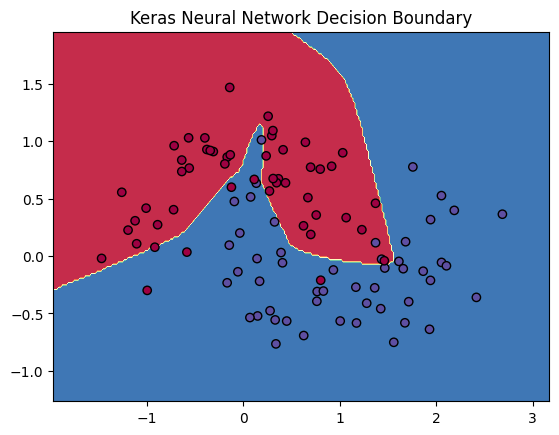

In [ ]:
# 📉 Plot Keras decision boundary
def plot_keras_decision_boundary(model, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > threshold).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
    plt.title("Keras Neural Network Decision Boundary")
    plt.show()

plot_keras_decision_boundary(model, X, y)

# 🎨 Multi-class Example

Let’s now build a **multi-class classification** network using Keras and visualize its results.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Create a dataset with 4 classes
X_multi, y_multi = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)
num_classes = len(np.unique(y_multi))

# Split and one-hot encode
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)
y_train_multi_cat = to_categorical(y_train_multi, num_classes)
y_test_multi_cat = to_categorical(y_test_multi, num_classes)

# Build model
model_multi = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile and train
model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_multi.fit(X_train_multi, y_train_multi_cat, epochs=100, batch_size=32, verbose=0)

print(f"Multi-class accuracy: {model_multi.evaluate(X_test_multi, y_test_multi_cat, verbose=0)[1]:.2f}")

Multi-class accuracy: 1.00


29918/29918 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


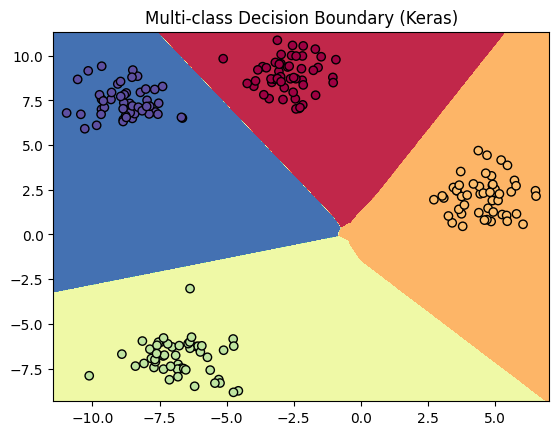

In [ ]:
# 🎯 Plot multi-class decision boundary
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
    plt.title("Multi-class Decision Boundary (Keras)")
    plt.show()

plot_multiclass_decision_boundary(model_multi, X_multi, y_multi)

# ✅ Summary

- Neural networks are built from **neurons** that process weighted inputs and apply **activation functions**.
- **Forward pass** computes predictions; **backpropagation** updates weights to minimize error.
- With libraries like **Scikit-learn** and **TensorFlow Keras**, implementing powerful models becomes easy.
- Neural networks can model complex relationships but can be **computationally heavy** and less interpretable.

👉 Use them when simpler models (like trees or linear models) aren’t enough!